Загрузка PySpark

In [1]:
!apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:12 http://ppa.launchpad.net/cran/libgit2/u

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [3]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz

In [4]:
!tar -xvf spark-3.2.1-bin-hadoop3.2.tgz

spark-3.2.1-bin-hadoop3.2/
spark-3.2.1-bin-hadoop3.2/LICENSE
spark-3.2.1-bin-hadoop3.2/NOTICE
spark-3.2.1-bin-hadoop3.2/R/
spark-3.2.1-bin-hadoop3.2/R/lib/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/DESCRIPTION
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/INDEX
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/Rd.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/features.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/hsearch.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/links.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/nsInfo.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/package.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/Meta/vignette.rds
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/NAMESPACE
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdb
spark-3.2.1-bin-hadoop3.2/R/lib/SparkR/R/SparkR.rdx
spark-3.2.1-bin-hadoop3.2/R/lib/Sp

In [5]:
!pip install -q findspark

In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [7]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = spark.sparkContext

In [28]:
df=spark.read.csv('Iris-2.csv', inferSchema=True, header=True)

In [29]:
df.take(5)

[Row(Id=1, SepalLengthCm=5.1, SepalWidthCm=3.5, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=2, SepalLengthCm=4.9, SepalWidthCm=3.0, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=3, SepalLengthCm=4.7, SepalWidthCm=3.2, PetalLengthCm=1.3, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=4, SepalLengthCm=4.6, SepalWidthCm=3.1, PetalLengthCm=1.5, PetalWidthCm=0.2, Species='Iris-setosa'),
 Row(Id=5, SepalLengthCm=5.0, SepalWidthCm=3.6, PetalLengthCm=1.4, PetalWidthCm=0.2, Species='Iris-setosa')]

In [30]:
df.columns

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [47]:
df.select('Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm').groupBy('Species').max().show()

+---------------+------------------+-----------------+------------------+-----------------+
|        Species|max(SepalLengthCm)|max(SepalWidthCm)|max(PetalLengthCm)|max(PetalWidthCm)|
+---------------+------------------+-----------------+------------------+-----------------+
| Iris-virginica|               7.9|              3.8|               6.9|              2.5|
|    Iris-setosa|               5.8|              4.4|               1.9|              0.6|
|Iris-versicolor|               7.0|              3.4|               5.1|              1.8|
+---------------+------------------+-----------------+------------------+-----------------+



In [48]:
df.select('Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm').groupBy('Species').min().show()

+---------------+------------------+-----------------+------------------+-----------------+
|        Species|min(SepalLengthCm)|min(SepalWidthCm)|min(PetalLengthCm)|min(PetalWidthCm)|
+---------------+------------------+-----------------+------------------+-----------------+
| Iris-virginica|               4.9|              2.2|               4.5|              1.4|
|    Iris-setosa|               4.3|              2.3|               1.0|              0.1|
|Iris-versicolor|               4.9|              2.0|               3.0|              1.0|
+---------------+------------------+-----------------+------------------+-----------------+



In [52]:
df.select('Species', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm').groupBy('Species').avg().show()

+---------------+------------------+------------------+------------------+------------------+
|        Species|avg(SepalLengthCm)| avg(SepalWidthCm)|avg(PetalLengthCm)| avg(PetalWidthCm)|
+---------------+------------------+------------------+------------------+------------------+
| Iris-virginica| 6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Iris-setosa| 5.005999999999999|3.4180000000000006|             1.464|0.2439999999999999|
|Iris-versicolor|             5.936|2.7700000000000005|              4.26|1.3259999999999998|
+---------------+------------------+------------------+------------------+------------------+



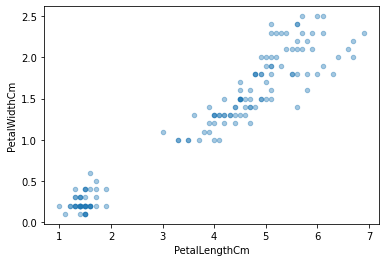

In [107]:
import pandas as pd
%matplotlib inline
# import seaborn as sns
import matplotlib.cm as cm
import numpy as np
t = np.arange(4)
pd_df=df.toPandas()
#pd_df.plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color="Species")
pd_df.plot.scatter(x='PetalLengthCm', y='PetalWidthCm', cmap='coolwarm', alpha=0.4)

In [123]:
from pyspark.sql.functions import when
df_new = df.withColumn("Class" , when(df.PetalLengthCm <= 1.9, "Iris-setosa").otherwise("UNKNOWN"))
df_new.show()

+---+-------------+------------+-------------+------------+-----------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|      Class|
+---+-------------+------------+-------------+------------+-----------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|Iris-

In [126]:
df_new_filter1 = df_new.where(df_new['Class'] == 'Iris-setosa')
df_new_filter1.count()

50

In [127]:
df_new_filter2 = df_new.where(df_new['Class'] != 'Iris-setosa')
df_new_filter2.count()

100